In [2]:
import sys

In [3]:
sys.path

['/Users/rpghosh/python-examples/webscraping/weathermap',
 '/Users/rpghosh/Desktop/anaconda3/lib/python38.zip',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/site-packages',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/rpghosh/.ipython']

In [5]:
sys.path.append('/Users/rpghosh/opt/anaconda3/lib/python3.8/site-packages')

In [6]:
sys.path

['/Users/rpghosh/python-examples/webscraping/weathermap',
 '/Users/rpghosh/Desktop/anaconda3/lib/python38.zip',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/site-packages',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/rpghosh/.ipython',
 '/Users/rpghosh/opt/anaconda3/lib/python3.8/site-packages']

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [10]:
df = pd.read_csv('/Users/rpghosh/python-examples/webscraping/500_Person_Gender_Height_Weight_Index.csv')

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height,500.0,169.944,16.375261,140.0,156.0,170.5,184.0,199.0
Weight,500.0,106.000,32.382607,50.0,80.0,106.0,136.0,160.0
Index,500.0,3.748,1.355053,0.0,3.0,4.0,5.0,5.0


In [13]:
df.describe(include=['float', 'int'], percentiles=[.2,.4,.6,.8,1.0]).transpose()

,count,mean,std,min,20%,40%,50%,60%,80%,100%,max
Height,500.0,169.944,16.375261,140.0,153.0,165.0,170.5,177.0,186.0,199.0,199.0
Weight,500.0,106.000,32.382607,50.0,72.8,96.0,106.0,117.0,140.0,160.0,160.0
Index,500.0,3.748,1.355053,0.0,2.0,4.0,4.0,4.0,5.0,5.0,5.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [15]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [17]:
df.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [147]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [148]:
number = LabelEncoder()

In [149]:
df['Gender'] = number.fit_transform(  df['Gender'].astype('str') )

In [150]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [151]:
# features 
X = df.iloc[ : , :-1].values

# ------------------------------
# You could even do it like this 
# ------------------------------
# features = ['Gender', 'Height', 'Weight']
# X = df[features]


In [152]:
X

array([[  1, 174,  96],
       [  1, 189,  87],
       [  0, 185, 110],
       ...,
       [  0, 141, 136],
       [  1, 150,  95],
       [  1, 173, 131]])

In [153]:
# outcome

y = df.iloc[:, -1].values

# ------------------------------
# You could do like this as well
# ------------------------------
# y = df['Index']

In [154]:
y

array([4, 2, 4, 3, 3, 3, 5, 5, 3, 4, 2, 4, 3, 2, 2, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 2, 3, 3, 1, 5, 5, 5, 1, 1, 5, 5, 4, 3, 4, 5, 2, 4, 5, 2, 5,
       4, 2, 4, 4, 3, 5, 5, 1, 5, 4, 4, 3, 4, 5, 3, 5, 0, 5, 0, 2, 5, 5,
       4, 2, 4, 4, 2, 4, 5, 2, 3, 4, 4, 4, 4, 0, 3, 5, 3, 4, 5, 0, 5, 5,
       5, 5, 5, 3, 3, 2, 4, 5, 4, 5, 1, 0, 4, 5, 5, 4, 4, 4, 5, 5, 4, 3,
       4, 5, 4, 2, 4, 3, 2, 5, 5, 5, 4, 4, 4, 5, 5, 4, 4, 4, 5, 2, 5, 2,
       5, 4, 5, 5, 5, 3, 5, 5, 2, 4, 5, 5, 5, 4, 3, 5, 3, 3, 0, 3, 3, 5,
       5, 4, 3, 5, 3, 4, 2, 2, 3, 5, 4, 2, 4, 5, 3, 2, 4, 5, 5, 4, 4, 4,
       4, 3, 5, 3, 3, 4, 4, 2, 3, 3, 5, 3, 5, 4, 5, 5, 4, 5, 5, 5, 4, 4,
       5, 5, 1, 3, 4, 4, 5, 4, 5, 4, 3, 4, 4, 5, 5, 5, 0, 5, 5, 5, 5, 5,
       2, 5, 4, 5, 0, 5, 3, 4, 5, 5, 4, 2, 3, 3, 4, 3, 5, 5, 2, 5, 3, 2,
       1, 5, 0, 5, 3, 5, 3, 4, 3, 5, 5, 5, 5, 2, 4, 5, 5, 4, 5, 5, 5, 2,
       4, 5, 5, 5, 5, 1, 5, 5, 4, 0, 3, 3, 4, 2, 3, 1, 1, 5, 5, 4, 4, 4,
       4, 5, 2, 5, 4, 3, 3, 4, 5, 5, 2, 4, 3, 4, 5,

In [155]:
# we need to divide into train and test and we will use LOOCV (Leave One Out Cross Validation) technique

In [156]:
# we need to pick the optimal value of K-neighbour (K) as well when we get least RMSE (root mean square error) 

In [157]:
from sklearn.model_selection import LeaveOneOut

In [158]:
l = LeaveOneOut()

In [159]:
from sklearn.metrics import mean_squared_error, r2_score

In [160]:
from math import sqrt

In [161]:
from sklearn import neighbors

In [235]:
rmse = []
for K in range(20):

    actual = []
    predicted = []
    
    K = K + 1
  
    for train_index, test_index in l.split(X):
        
        X_train , X_test = X[train_index], X[test_index]
        y_train , y_test = y[train_index], y[test_index]

        scaler = MinMaxScaler(feature_range=(0, 1))

        x_train_scaled = scaler.fit_transform(X_train)
        X_train = pd.DataFrame(x_train_scaled)

        x_test_scaled = scaler.fit_transform(X_test)
        X_test = pd.DataFrame(x_test_scaled)

        model = neighbors.KNeighborsClassifier(n_neighbors= K)
        
        model.fit(X_train, y_train)
        
        y_predicted = model.predict(X_test)
        
        actual.append( y_test[0] )
        predicted.append( y_predicted[0] )
        
        
    rmse.append( {'K':K, 'RMSE':sqrt(mean_squared_error(actual, predicted))} )
        
    
    
    
    

In [236]:
rmse

[{'K': 1, 'RMSE': 2.212690669750293},
 {'K': 2, 'RMSE': 2.2108821768696765},
 {'K': 3, 'RMSE': 2.2108821768696765},
 {'K': 4, 'RMSE': 2.2108821768696765},
 {'K': 5, 'RMSE': 2.2108821768696765},
 {'K': 6, 'RMSE': 2.2108821768696765},
 {'K': 7, 'RMSE': 2.2163032283512107},
 {'K': 8, 'RMSE': 2.2108821768696765},
 {'K': 9, 'RMSE': 2.2108821768696765},
 {'K': 10, 'RMSE': 2.2181073012818833},
 {'K': 11, 'RMSE': 2.212690669750293},
 {'K': 12, 'RMSE': 2.2181073012818833},
 {'K': 13, 'RMSE': 1.3914021704740869},
 {'K': 14, 'RMSE': 2.219909908081857},
 {'K': 15, 'RMSE': 1.39427400463467},
 {'K': 16, 'RMSE': 2.2108821768696765},
 {'K': 17, 'RMSE': 2.2108821768696765},
 {'K': 18, 'RMSE': 2.2108821768696765},
 {'K': 19, 'RMSE': 2.2108821768696765},
 {'K': 20, 'RMSE': 2.2108821768696765}]

In [237]:
elbow_curve = pd.DataFrame( [item['RMSE'] for item in rmse] )

<AxesSubplot:>

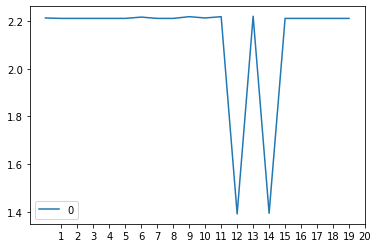

In [238]:
elbow_curve.plot(xticks = [item['K'] for item in rmse])

In [239]:
rmse.sort(key= lambda x : x['RMSE'], reverse=False)

In [240]:
rmse

[{'K': 13, 'RMSE': 1.3914021704740869},
 {'K': 15, 'RMSE': 1.39427400463467},
 {'K': 2, 'RMSE': 2.2108821768696765},
 {'K': 3, 'RMSE': 2.2108821768696765},
 {'K': 4, 'RMSE': 2.2108821768696765},
 {'K': 5, 'RMSE': 2.2108821768696765},
 {'K': 6, 'RMSE': 2.2108821768696765},
 {'K': 8, 'RMSE': 2.2108821768696765},
 {'K': 9, 'RMSE': 2.2108821768696765},
 {'K': 16, 'RMSE': 2.2108821768696765},
 {'K': 17, 'RMSE': 2.2108821768696765},
 {'K': 18, 'RMSE': 2.2108821768696765},
 {'K': 19, 'RMSE': 2.2108821768696765},
 {'K': 20, 'RMSE': 2.2108821768696765},
 {'K': 1, 'RMSE': 2.212690669750293},
 {'K': 11, 'RMSE': 2.212690669750293},
 {'K': 7, 'RMSE': 2.2163032283512107},
 {'K': 10, 'RMSE': 2.2181073012818833},
 {'K': 12, 'RMSE': 2.2181073012818833},
 {'K': 14, 'RMSE': 2.219909908081857}]

In [242]:
# K = 13 gives the lowest RMSE
# we will use HoldOut CV

In [254]:
K = 13

In [255]:
finalmodel = neighbors.KNeighborsClassifier(K)

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
from sklearn.preprocessing import MinMaxScaler

In [258]:
df.head(), df.tail()

(   Gender  Height  Weight  Index
 0       1     174      96      4
 1       1     189      87      2
 2       0     185     110      4
 3       0     195     104      3
 4       1     149      61      3,
      Gender  Height  Weight  Index
 495       0     150     153      5
 496       0     184     121      4
 497       0     141     136      5
 498       1     150      95      5
 499       1     173     131      5)

In [259]:
df.iloc[:, :-1].values

array([[  1, 174,  96],
       [  1, 189,  87],
       [  0, 185, 110],
       ...,
       [  0, 141, 136],
       [  1, 150,  95],
       [  1, 173, 131]])

In [260]:
actual = []
predicted = []
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test , y_train, y_test = train_test_split(X , y, train_size=0.8, test_size=0.2, random_state=1)

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(x_test_scaled)
    
y_predicted = finalmodel.fit ( X_train, y_train).predict(X_test)
        
RMSE = sqrt(mean_squared_error(y_test, y_predicted))

In [261]:
RMSE

0.5099019513592785

In [262]:
r2_score(y_test, y_predicted)

0.8663857341076109

In [263]:
from sklearn.metrics import confusion_matrix

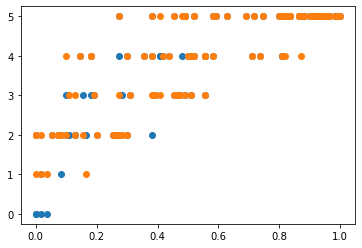

In [264]:
plt.scatter(x=X_test[2].values, y = y_test)
plt.scatter(x=X_test[2].values, y = y_predicted)

In [265]:
confusion_matrix(y_test, y_predicted)

array([[ 0,  2,  2,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0],
       [ 0,  1, 11,  3,  0,  0],
       [ 0,  0,  2,  9,  2,  0],
       [ 0,  0,  0,  2, 17,  3],
       [ 0,  0,  0,  0,  2, 42]])